# --------------------------------------------------------------------------------------------------------
#                                     World Internet Access Analysis
# --------------------------------------------------------------------------------------------------------

## **1. What are the top 5 countries with the highest internet use (by population share)?**

### First we will take a look at the data available:

In [13]:
import pandas as pd
import numpy as np

internet_df = pd.read_csv("data/internet.csv")
broadband_df = pd.read_csv("data/broadband.csv")
people_df = pd.read_csv("data/people.csv")

print(internet_df.head(5))
print(broadband_df.head(5))
print(people_df.head(5))

        Entity Code  Year  Internet_Usage
0  Afghanistan  AFG  1990             0.0
1  Afghanistan  AFG  1991             0.0
2  Afghanistan  AFG  1992             0.0
3  Afghanistan  AFG  1993             0.0
4  Afghanistan  AFG  1994             0.0
        Entity Code  Year  Broadband_Subscriptions
0  Afghanistan  AFG  2004                 0.000809
1  Afghanistan  AFG  2005                 0.000858
2  Afghanistan  AFG  2006                 0.001892
3  Afghanistan  AFG  2007                 0.001845
4  Afghanistan  AFG  2008                 0.001804
        Entity Code  Year  Users
0  Afghanistan  AFG  1990      0
1  Afghanistan  AFG  1991      0
2  Afghanistan  AFG  1992      0
3  Afghanistan  AFG  1993      0
4  Afghanistan  AFG  1994      0


### Here we see that we can answer this question using the internet_df by analysing data from the Internet_Usage column. Since the data is arranged by country and year, we can take the Internet_Usage data from the countries' latest year. Let's check if the latest data from all countries are from the same year:

In [14]:
countries_latest_year = internet_df.groupby('Entity')['Year'].max()
countries_latest_year

Entity
Afghanistan                    2017
Africa Eastern and Southern    2017
Africa Western and Central     2015
Albania                        2019
Algeria                        2018
                               ... 
Vietnam                        2019
World                          2017
Yemen                          2017
Zambia                         2017
Zimbabwe                       2017
Name: Year, Length: 261, dtype: int64

### As we can see, the countries' latest year isn't the same. We can answer the question considering only the countries with data from the latest year:

In [15]:
maximum_latest_year = countries_latest_year.values.max()
print(maximum_latest_year)

2019


### The latest year dated in the dataframe is 2019. We can now make a dataframe with only the countries that have data from 2019:

In [16]:
internet_2019_df = pd.DataFrame(internet_df[internet_df["Year"] == 2019])
internet_2019_df

,Entity,Code,Year,Internet_Usage
104,Albania,ALB,2019,69.642855
385,Austria,AUT,2019,87.752205
470,Bahrain,BHR,2019,99.701504
551,Belarus,BLR,2019,82.789152
581,Belgium,BEL,2019,90.370513
...,...,...,...,...
6580,Turkey,TUR,2019,73.976704
6716,United Arab Emirates,ARE,2019,99.149998
6746,United Kingdom,GBR,2019,92.516629
6861,Uruguay,URY,2019,76.949552


### To find the 5 countries with the highest internet usage by population share we simply order the Internet_Usage column by the highests and print the 5 countries at the top: 

In [17]:
internet_2019_df = internet_2019_df.sort_values("Internet_Usage", ascending=False)
top_5_internet_usage = internet_2019_df.iloc[:5, 0].values
print(top_5_internet_usage)

['Bahrain' 'Qatar' 'Kuwait' 'United Arab Emirates' 'Denmark']


### We found the top 5 countries by internet usage! They are:
### 1. **Bahrain** 
### 2. **Qatar**
### 3. **Kuwait**
### 4. **United Arab Emirates**
### 5. **Denmark**

## 2. How many people had internet access in those countries in 2019?

### To answer this question we will need to use the people_df dataframe containing the number of users per country per year:

In [18]:
top_5_condition = (people_df["Year"] == 2019) & (people_df["Entity"].isin(top_5_internet_usage))
people_internet_top_5_2019_df = pd.DataFrame(people_df[top_5_condition])
people_internet_top_5_2019_df

,Entity,Code,Year,Users
477,Bahrain,BHR,2019,1489735
1565,Denmark,DNK,2019,5682653
3091,Kuwait,KWT,2019,4420795
4728,Qatar,QAT,2019,2797495
5986,United Arab Emirates,ARE,2019,9133361


### We can see the number of users in these countries in the year of 2019:
### 1. **Bahrain - 1,489,735** 
### 2. **Qatar - 2,797,495**
### 3. **Kuwait - 4,420,795**
### 4. **United Arab Emirates - 9,133,361**
### 5. **Denmark - 5,682,653**

## 3. What are the 5 countries with the most internet users?

### For this question, we can create a dataframe the same way the internet_2019_df was created, but now from the people_df. This way we will find the top 5 countries in number of users for the year 2019:

In [19]:
people_2019_df = pd.DataFrame(people_df[people_df["Year"] == 2019]).sort_values("Users", ascending=False)
people_2019_df

,Entity,Code,Year,Users
6287,World,OWID_WRL,2019,4194082864
327,Asia,NaN,2019,2222069463
6107,Upper-middle-income countries,NaN,2019,1689000449
3408,Lower-middle-income countries,NaN,2019,1185788974
2543,High-income countries,NaN,2019,1057075175
...,...,...,...,...
4879,Saint Lucia,LCA,2019,90547
5095,Seychelles,SYC,2019,78290
2334,Grenada,GRD,2019,68733
4986,Sao Tome and Principe,STP,2019,68676


### To only show the rows containing the countries, we remove all rows that aren't countries:

In [20]:
people_2019_df = people_2019_df[(people_2019_df["Code"].isna() == False) & (people_2019_df["Code"] != "OWID_WRL")]
people_2019_df

,Entity,Code,Year,Users
1230,China,CHN,2019,911554782
2698,India,IND,2019,406634942
6048,United States,USA,2019,298983035
833,Brazil,BRA,2019,156533889
2729,Indonesia,IDN,2019,128565820
...,...,...,...,...
4879,Saint Lucia,LCA,2019,90547
5095,Seychelles,SYC,2019,78290
2334,Grenada,GRD,2019,68733
4986,Sao Tome and Principe,STP,2019,68676


### We can see that the top 5 countries in number of internet users are:
### 1. China - 911,554,782
### 2. India - 406,634,942
### 3. United States - 298,983,035
### 4. Brazil - 156,533,889
### 5. Indonesia - 128,565,820

## 4. What is the correlation between internet usage (population share) and broadband subscriptions for 2019?

### First we need to create a new dataframe for the 2019 broadband subscriptions and then merge it with the internet_2019_df dataframe:

In [25]:
broadband_2019_df = broadband_df[broadband_df["Year"] == 2019]
broadband_2019_df

correlation_share_subscriptions_2019_df = pd.merge(internet_2019_df, broadband_2019_df, on="Entity", how="inner")
correlation_share_subscriptions_2019_df

,Entity,Code_x,Year_x,Internet_Usage,Code_y,Year_y,Broadband_Subscriptions
0,Bahrain,BHR,2019,99.701504,BHR,2019,8.590934
1,Qatar,QAT,2019,99.652804,QAT,2019,10.051987
2,Kuwait,KWT,2019,99.542676,KWT,2019,2.010776
3,United Arab Emirates,ARE,2019,99.149998,ARE,2019,31.174944
4,Denmark,DNK,2019,98.046435,DNK,2019,43.945988
...,...,...,...,...,...,...,...
65,Egypt,EGY,2019,57.282869,EGY,2019,7.569566
66,Mongolia,MNG,2019,51.079994,MNG,2019,9.838778
67,Indonesia,IDN,2019,47.690649,IDN,2019,3.800219
68,Kenya,KEN,2019,22.565119,KEN,2019,0.934270


### Now we can plot the data in the columns "Internet_Usage" and "Broadband_Subscriptions" to take a look on how they correlate:

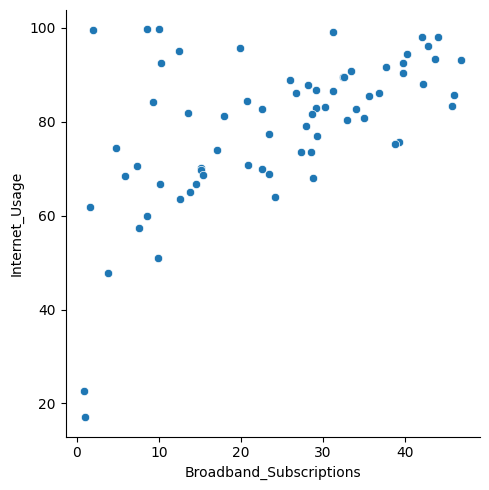

In [32]:
import seaborn as sns
import matplotlib.pyplot as plt

correlation_share_subscriptions_2019_plt = sns.relplot(x="Broadband_Subscriptions", y="Internet_Usage", data=correlation_share_subscriptions_2019_df, kind="scatter")
plt.show()

### Just taking a look at this plot isn't enough to take a good conclusion about the correlation between Internet_Usage and Broadband_Subscriptions, so we will use a plot that shows a trendline to visualize the possible correlation:

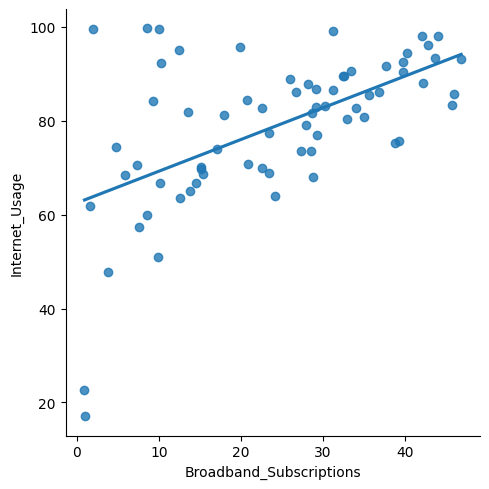

In [33]:
correlation_share_subscriptions_2019_plt_trendline = sns.lmplot(x="Broadband_Subscriptions", y="Internet_Usage", data=correlation_share_subscriptions_2019_df, ci=None)

### Now we can see some correlation between the two variables. To know the exact value for the correlation and what it means, we can use:

In [30]:
correlation_share_subscriptions_2019_df["Internet_Usage"].corr(correlation_share_subscriptions_2019_df["Broadband_Subscriptions"])

0.5590077105170113

### The correlation value given can be classified as moderate. This way, we can say the more broadband subscriptions a country has, bigger is the population share that uses internet. It makes sense, right?

## In this little project we had the chance to take a quick look in some data about the internet usage in the world. Of course there are lots approaches we can take to find information about this field, so feel free to continue this work!!